<br><br>

## Image Processing Techniques

### Introduction

As you may have noticed, each of our pages in our various tutorials are introduced by eye candy pictures, which have created with great care to enrich the content. One of those images has been the raison d'être of this chapter.
We want to demonstrate how we created the picture for our [chapter on Decorators](python3_decorators.php). The idea was to play with decorators in "real life", small icons with images of small workers painting a room and on the other hand blending this with the "at" sign, the Python symbol for decorator. It is also a good example of how to create a watermark.

We will demonstrate in this chapter the whole process chain of how we created this image. The picture on the right side of the current page has also been created the same way but uses a director's chair on a small painters background as a watermark instead of the at sign. 

At first, we write a function "imag_tile" for tiling images both in horizontal and in vertical direction. We will use this to create the background of our image.

Then we show how to cut out with slicing a cutout or an excerpt of an 
image. We will use the shade function, which we introduced in our previous chapter on image processing, to shade our image. 

Finally, we will use the original image, the shaded image, plus an image with a binary at sign with the conditional numpy where function to create the final image. The final image contains the at sign as a watermark, cut out from the shaded image.

<br><br>

### Tiling an Image

The function imag_tile, which we are going to design, can be best explained with the following diagram:



<img width=90% src="images/imag_tile_explanation.png" alt="Way of working of imag_tile" />




The function imag_tile 

<code>imag_tile(img, n, m)</code>

creates a tiled image by appending an image "img" m times in horizontal direction. After this we append the strip image consisting of m img images n times in vertical direction.

In the following code, we use a picture of painting [decorators](./images/decorators_b2.png) as the tile image:

<img  src="images/decorators_b2.png" alt="Four green painting decorators" />

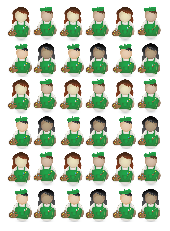

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

def imag_tile(img, n, m=1):
    """
    The image "img" will be repeated n times in 
    vertical and m times in horizontal direction.
    """

    if n == 1:
        tiled_img = img
    else:
        lst_imgs = []
        for i in range(n):
             lst_imgs.append(img)  
        tiled_img = np.concatenate(lst_imgs, axis=1 )
    if m > 1:
        lst_imgs = []
        for i in range(m):
             lst_imgs.append(tiled_img)  
        tiled_img = np.concatenate(lst_imgs, axis=0 )
          
    return tiled_img

basic_pattern = mpimg.imread('decorators_b2.png')

decorators_img = imag_tile(basic_pattern, 3, 3)

plt.axis("off")
plt.imshow(decorators_img)

An image is a 3-dimensional numpy ndarray. 

In [2]:
type(basic_pattern)

numpy.ndarray

The first three rows of our image basic_pattern look like this:

In [3]:
basic_pattern[:3]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

The innermost lists of our image contain the pixels. We have three values corresponding the the R, G, and B values, this means that we have a 24-bit RGB PNG image, eight  bits for each of R, G, B. 

PNG images might also consist of 32-bit images (RGBA). The fourth value "A" will be used for transparancy, single channel grayscale. 

It's easy to access indivual pixels by indexing, e.g. the pixel in row 100 and column 20:

In [4]:
basic_pattern[100, 28]

array([0.9019608, 0.8901961, 0.8627451], dtype=float32)

As we have seen, the pixels are float (float32) values between 0 and 1. Matplotlib plotting can handle both float32 and uint8 for PNG images. For all other formats it will be only uint8.

<br><br>

### Crop Images

We can also crop subimages with the slicing function. We crop the image from (90, 50), i.e. row 90 and column 50, to (50, 120) in the following example:

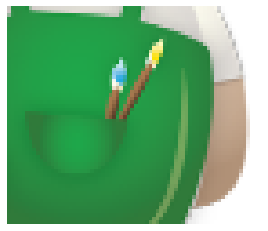

In [5]:
cropped = basic_pattern[90:150, 50:120]
plt.axis("off")
plt.imshow(cropped)

We will need this technique in the following. 

We will load the [image of an at sign](./images/at_sign.png) in the following script:

<img width=50 src="images/at_sign.png" alt="at sign" />

We can use the slicing function to crop parts of an image. We will use this to make sure that both images have the same size.

In [6]:
at_img=mpimg.imread('at_sign.png')

# at_img and decorators_img have to be of equal size:
d_shape = decorators_img.shape
at_shape = at_img.shape
height, width, colours = [min(x) for x in zip(*(d_shape, at_shape))]
at_img = at_img[0:height, 0:width]

<br><br>

### Shade an Image

We define a function "shade" in the following script. "shade" takes two parameters. The first one "imag" is the image, which will be shaded and the second one is the shading factor. It can be a value between 0 and 1. If the factor is set to 0, imag will remain unchanged. If set to one, the image will be completetely blackened. 

[[[0.5 0.5 0.5]
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]
  ...
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]]

 [[0.5 0.5 0.5]
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]
  ...
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]]

 [[0.5 0.5 0.5]
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]
  ...
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]
  [0.5 0.5 0.5]]]


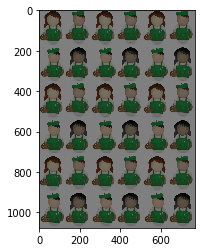

In [7]:
def shade(imag, percent):
    """
    imag: the image which will be shaded
    percent: a value between 0 (image will remain unchanged
             and 1 (image will be blackened)
    """
    tinted_imag = imag * (1 - percent)
    return tinted_imag

tinted_decorator_img = shade(decorators_img, 0.5)
plt.imshow(tinted_decorator_img)
print(tinted_decorator_img[:3])

<br><br>

### Blend Images

#### First example

We have everything together now to create the blended image. Our at sign picture consists of black and white pixels. The blended image is constructed like this:
Let p=(n, m) be an arbitrary pixel in the n-th row and m-th column of the image at_image. If the value of this pixel is not black or dark gray, we will use the pixel at position (n, m) from the picture decorators_img, otherwise, we will use the corresponding pixel from tinted_decorator_img. The where function of numpy is ideal for this task:

(1077, 771, 3) (1077, 771, 3) (1077, 771, 3)


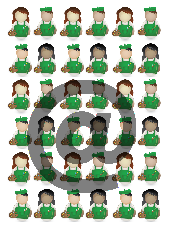

In [9]:
print(at_img.shape, 
      decorators_img.shape, 
      tinted_decorator_img.shape)
#basic_pattern = mpimg.imread('decorators2.png')
img2 = np.where(at_img > [0.1, 0.1, 0.1], 
                decorators_img, 
                tinted_decorator_img)

plt.axis("off")
plt.imshow(img2)

All there is left to do is save the newly created image:

In [10]:
mpimg.imsave('decorators_with_at.png', img2)

#### Second Example

We want to use now a different image as a "watermark". Instead of the at sign, we want to use now a director's chair. We will create the image from the top of this page. 

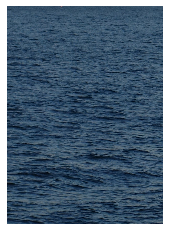

In [11]:
images = [mpimg.imread(fname) for fname in ["director_chair.png", "the_sea.png", "the_sky.png"]]
director_chair, sea, sky = images


plt.axis("off")
plt.imshow(sea)

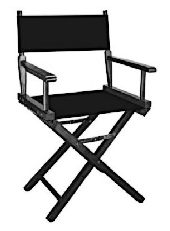

In [12]:
plt.axis("off")
plt.imshow(director_chair)

In the following, we blend together the images director_chair, decorators_img and sea by using where of numpy once more:

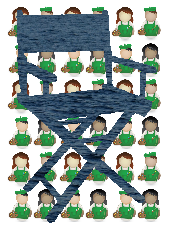

In [16]:
#sea2 = mpimg.imread('the_sea2.png')
img = np.where(director_chair > [0.9, 0.9, 0.9], 
               decorators_img, 
               sea)
plt.axis("off")
plt.imshow(img)
mpimg.imsave('decorators_with_chair.png', img)

We could have used "Image.open" from PIL instead of mpimg.imread from matplotlib to read in the pictures. There is a crucial difference or a potential "problem" between these two ways: The image we get from imread has values between 0 and 1, whereas Image.open consists of values between 0 and 255. So we might have to divide all the pixels by 255, if we have to work with an image read in by mpimg.imread:

[27 27 27]


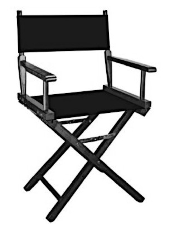

In [17]:
from PIL import Image


img = Image.open("director_chair.jpg")
img = img.resize((at_img.shape[1], at_img.shape[0]))
img = np.asarray(img)


plt.axis("off")
plt.imshow(img)

print(img[100, 129])


In [18]:
# PIL: Pixel are within range 0 and 255
# mpimg: range 0 bis 1

img = np.asarray(img, np.float)
img = img / 255  

print(img[100, 129])


[0.10588235 0.10588235 0.10588235]
